https://youtu.be/HrdK6A9CIxU
# 用 Pandas 產生樞紐報表 (pivot table)

樞紐報表是 Excel 非常强大的功能，可以將大量的資料，依照制定的資料樣式重新分類整合。只要確定了新分類的表格樣式，透過簡單的操作就可以輕鬆產生新的報表。

![](https://drive.google.com/uc?export=download&id=1a55oDUBjn1Cs5Xyqzy0FulXP8hjsSYXE)

若今天樞紐報表十分複雜，在圖像化界面上就很難快速的透過手動的方式快速的產生樞紐報表。

但是今天我們若希望透過程式化的方式來產生樞紐報表，我們其實可以活用 Pandas 的 DataFrame 產生樞紐報表，不但效率快，而且語法十分簡單。

In [3]:
import xlwings as xw
# 請輸入 pivot_table.xlsx 的絕對路徑
wb = xw.Book(r"pivot_table.xlsx")

data_sheet = wb.sheets["銷售數據"]

report_sheet = wb.sheets["報告"]

## 如何能夠把工作表内的資料放入 DataFrame?

若我們今天直接執行 **range(起點:結束點).value**，預設上 **xlwings** 會將資料以二維串列(2d list)的形式將資料回傳給我們

但是，若今天我們希望能夠該範圍的資料放入一個 DataFrame 呢？

```python
data_sheet.range("A1:B2").value

# [
#    ['訂單號碼', '日期'],
#    ['A0001', datetime.datetime(2017, 1, 1, 0, 0)]
# ]
```

In [4]:
# return a 2維 list
# but this is not the thing we want
data_sheet.range("A1:F201").value

[['訂單號碼', '日期', '商店', '業務員', '產品', '金額'],
 ['A0001', datetime.datetime(2017, 1, 1, 0, 0), '松仁超商', '簡家凡', '香蕉', 10185.0],
 ['A0002',
  datetime.datetime(2017, 1, 6, 0, 0),
  '尚林食品公司',
  '柯佳偉',
  '芒果',
  13680.0],
 ['A0003', datetime.datetime(2017, 1, 7, 0, 0), '快樂水果運銷', '朱明樺', '柚子', 6116.0],
 ['A0004', datetime.datetime(2017, 1, 9, 0, 0), '品國水國行', '林玟君', '芒果', 13136.0],
 ['A0005', datetime.datetime(2017, 1, 9, 0, 0), '三華超商', '朱明樺', '蕃茄', 16440.0],
 ['A0006',
  datetime.datetime(2017, 1, 10, 0, 0),
  '尚林食品公司',
  '王宇倫',
  '香蕉',
  11795.0],
 ['A0007',
  datetime.datetime(2017, 1, 10, 0, 0),
  '尚林食品公司',
  '王宇倫',
  '香蕉',
  10392.0],
 ['A0008',
  datetime.datetime(2017, 1, 15, 0, 0),
  '品國水國行',
  '朱明樺',
  '芒果',
  17118.0],
 ['A0009',
  datetime.datetime(2017, 1, 15, 0, 0),
  '尚林食品公司',
  '簡家凡',
  '柚子',
  19280.0],
 ['A0010',
  datetime.datetime(2017, 1, 15, 0, 0),
  '尚林食品公司',
  '朱明樺',
  '柚子',
  20260.0],
 ['A0011', datetime.datetime(2017, 1, 15, 0, 0), '利吉超市', '柯佳偉', '蘋果', 12270.0],
 ['A0012',

##  range().options(format, expand=)

#### 之前取得last_row的方法太笨，直接用range().options()來抓整張表的資料

`range()` 的 `options()` 方法會要求使用者輸入兩個參數： **format** 以及 **expand** 

```python
range(範圍).options(format, expand="方向")
```


`format` 是你希望 xlwings 將**一個範圍的值以什麽樣的資料結構回傳**

`expand` 是讓 xlwings 自動偵測試算表資料的範圍

舉例來説，設定 `down` 代表往下搜尋，而設定 `table` 則是將整個試算表，連續的資料一次性的搜出並存入指定的資料結構内。

請嘗試執行以下程式碼：

```python
import numpy as np
# 將工作表的資料封裝成 Numpy Array
data_sheet.range("A1").options(np.array, expand="table").value
```


In [5]:
import numpy as np

# 將工作表的資料封裝成 Numpy Array
data_sheet.range("A1").options(np.array, expand="down").value

array(['訂單號碼', 'A0001', 'A0002', 'A0003', 'A0004', 'A0005', 'A0006',
       'A0007', 'A0008', 'A0009', 'A0010', 'A0011', 'A0012', 'A0013',
       'A0014', 'A0015', 'A0016', 'A0017', 'A0018', 'A0019', 'A0020',
       'A0021', 'A0022', 'A0023', 'A0024', 'A0025', 'A0026', 'A0027',
       'A0028', 'A0029', 'A0030', 'A0031', 'A0032', 'A0033', 'A0034',
       'A0035', 'A0036', 'A0037', 'A0038', 'A0039', 'A0040', 'A0041',
       'A0042', 'A0043', 'A0044', 'A0045', 'A0046', 'A0047', 'A0048',
       'A0049', 'A0050', 'A0051', 'A0052', 'A0053', 'A0054', 'A0055',
       'A0056', 'A0057', 'A0058', 'A0059', 'A0060', 'A0061', 'A0062',
       'A0063', 'A0064', 'A0065', 'A0066', 'A0067', 'A0068', 'A0069',
       'A0070', 'A0071', 'A0072', 'A0073', 'A0074', 'A0075', 'A0076',
       'A0077', 'A0078', 'A0079', 'A0080', 'A0081', 'A0082', 'A0083',
       'A0084', 'A0085', 'A0086', 'A0087', 'A0088', 'A0089', 'A0090',
       'A0091', 'A0092', 'A0093', 'A0094', 'A0095', 'A0096', 'A0097',
       'A0098', 'A009

In [6]:
data_sheet.range("A1").options(np.array, expand="table").value

array([['訂單號碼', '日期', '商店', '業務員', '產品', '金額'],
       ['A0001', datetime.datetime(2017, 1, 1, 0, 0), '松仁超商', '簡家凡',
        '香蕉', 10185.0],
       ['A0002', datetime.datetime(2017, 1, 6, 0, 0), '尚林食品公司', '柯佳偉',
        '芒果', 13680.0],
       ...,
       ['A0198', datetime.datetime(2017, 12, 12, 0, 0), '松仁超商', '林玟君',
        '蕃茄', 40491.0],
       ['A0199', datetime.datetime(2017, 12, 15, 0, 0), '利吉超市', '簡家凡',
        '蘋果', 14760.0],
       ['A0200', datetime.datetime(2017, 12, 17, 0, 0), '華清水果行', '柯佳偉',
        '蘋果', 9860.0]], dtype=object)

## options 範例

```python
import pandas as pd
# 這行代表以 A1 為起點，同時往下與往右搜尋，找出了連續範圍的右下角，將銷售資料截取出來，存入 DataFrame
df = data_sheet.range("A1").options(pd.DataFrame, expand="table").value

```
所以從圖示來看，`expand="table"` 就像是：
![](https://drive.google.com/uc?export=download&id=1AXJ4oKcqCFu4XyT9VRdb-FBrxvXgYNGm)


In [7]:
import pandas as pd
# 將銷售資料截取出來，存入 DataFrame
df = data_sheet.range("A1").options(pd.DataFrame, expand="table").value
df

,日期,商店,業務員,產品,金額
訂單號碼,,,,,
A0001,2017-01-01,松仁超商,簡家凡,香蕉,10185.0
A0002,2017-01-06,尚林食品公司,柯佳偉,芒果,13680.0
A0003,2017-01-07,快樂水果運銷,朱明樺,柚子,6116.0
A0004,2017-01-09,品國水國行,林玟君,芒果,13136.0
A0005,2017-01-09,三華超商,朱明樺,蕃茄,16440.0
...,...,...,...,...,...
A0196,2017-12-12,華清水果行,簡家凡,柚子,18185.0
A0197,2017-12-12,品國水國行,王宇倫,蕃茄,25767.0
A0198,2017-12-12,松仁超商,林玟君,蕃茄,40491.0


In [8]:
# 將 DataFrame 的索引設定成日期
df.set_index("日期")

,商店,業務員,產品,金額
日期,,,,
2017-01-01,松仁超商,簡家凡,香蕉,10185.0
2017-01-06,尚林食品公司,柯佳偉,芒果,13680.0
2017-01-07,快樂水果運銷,朱明樺,柚子,6116.0
2017-01-09,品國水國行,林玟君,芒果,13136.0
2017-01-09,三華超商,朱明樺,蕃茄,16440.0
...,...,...,...,...
2017-12-12,華清水果行,簡家凡,柚子,18185.0
2017-12-12,品國水國行,王宇倫,蕃茄,25767.0
2017-12-12,松仁超商,林玟君,蕃茄,40491.0


## Pandas 的 groupby 功能

先厘清我們是要以哪一欄做分類，將該欄的名稱以字串的方式指定給 **by**。像是資料庫SQL的groupby功能。

**DataFrame.groupby(by="欄位名稱")** Here we use "產品" to groupby.

In [9]:
df.groupby(by="產品", sort=True).sum()

,金額
產品,
柚子,721468.0
芒果,733462.0
蕃茄,691683.0
蘋果,869380.0
香蕉,542911.0


In [10]:
# 以產品的項目對 DataFrame 的資料做分類，將分類出來的結果做加總
report_df = df.groupby(by="產品").sum()
report_df

,金額
產品,
柚子,721468.0
芒果,733462.0
蕃茄,691683.0
蘋果,869380.0
香蕉,542911.0


In [11]:
# 問題是加總起來的資料並非依照大小來排列，所以我們就手動來排列資料 ascending>由小到大
final_report_df = report_df.sort_values(by="金額", ascending=False)
final_report_df

,金額
產品,
蘋果,869380.0
芒果,733462.0
柚子,721468.0
蕃茄,691683.0
香蕉,542911.0


## df.sum()

`df["欄名"].sum()` 會將指定一欄的資料加總起來 

In [12]:
final_report_df['金額'] / final_report_df['金額'].sum()

產品
蘋果    0.244283
芒果    0.206092
柚子    0.202722
蕃茄    0.194353
香蕉    0.152550
Name: 金額, dtype: float64

In [13]:
# 將所有的金額都除上加總，算出每一種水果的銷量的百分比
final_report_df['金額'] / final_report_df['金額'].sum()

產品
蘋果    0.244283
芒果    0.206092
柚子    0.202722
蕃茄    0.194353
香蕉    0.152550
Name: 金額, dtype: float64

In [14]:
# 問題是這樣的數字依然不明顯，所以我們另外在 DataFrame 加入新的一欄，計算出每一種水果的銷量的百分比
report_df["比例%"] =  report_df["金額"] * 100 / report_df["金額"].sum()
report_df

,金額,比例%
產品,,
柚子,721468.0,20.272196
芒果,733462.0,20.609210
蕃茄,691683.0,19.435281
蘋果,869380.0,24.428307
香蕉,542911.0,15.255005


In [15]:
# 問題是加總起來的資料並非依照大小來排列，所以我們就手動來排列資料
final_report_df = report_df.sort_values(by="金額", ascending=False)
final_report_df

,金額,比例%
產品,,
蘋果,869380.0,24.428307
芒果,733462.0,20.609210
柚子,721468.0,20.272196
蕃茄,691683.0,19.435281
香蕉,542911.0,15.255005


In [16]:
# 最後將這個 DataFrame 的資料寫回到 Excel
# 簡單來説，就是設定 DataFrame 資料在 Excel 的左上角
report_sheet = wb.sheets["報告"]
report_sheet.range('A1').value = final_report_df

![](https://drive.google.com/uc?export=download&id=16Wq9tV1QRItjlmjhlyE6gdXWPxrkMa4D)

# 令一種實作樞紐報表的功能：pivot_table 方法

用法：
```python
pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
```

看似很複雜，但從實務的角度來看，需要搞懂的是以下幾個最重要的參數：
(但是可以比groupby做到更細微的分層，老師跳過，跳至用python畫圖)

- index
- columns
- aggfunc

官方文件：[連結](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [ ]:
# 首先，任何樞紐報表都需要 index，也就是分類用的欄位，下面這邊我們是以 “產品” 這一欄爲例
pd.pivot_table(df, index=["產品"])

In [ ]:
# 接下來我們需要指定一個聚合資料時的函數 / 算法，這邊我們會使用 numpy 的加總函數 (np.sum)
# pivot_table 預設的 aggfunc 是 mean，代表計算平均值
import numpy as np

pd.pivot_table(df, index=["產品"], aggfunc=np.sum)

In [ ]:
# 針對加總之後的金額做排序
report = pd.pivot_table(df, index=["產品"], aggfunc=np.sum).sort_values(by="金額", ascending=False)
report

In [ ]:
report_sheet.range("A1").value = report

In [ ]:
pd.pivot_table(df, index="產品", columns="業務員", aggfunc=np.sum)

In [ ]:
# 也可從時間進行分層
pd.pivot_table(df, index=["產品"], columns=["日期"])

## 練習：

請利用樞紐報表計算出每一個業務員的業績，並且以大到小進行排序

# pivot_table vs groupby

兩者都是產生樞紐報表的功能，而 pivot_table 由於有 columns 參數，所以比 groupby **稍微更彈性，但是使用上也更複雜一點。**

In [ ]:
import pandas as pd
# 將工作表的資料封裝成 DataFrame
data_sheet.range("A1").options(pd.DataFrame, expand="table").value

# 產生圓餅圖

用 Python 產生樞紐報表的圓餅圖可以使用兩種不同的方式：

- 使用 Excel 原廠 Chart 物件
- 使用 Matplotlib

我們先來看用 Python 操作 Excel 原廠的圖表物件

In [19]:
# 空白圖表
# chart = report_sheet.charts.add()
# chart.set_source_data(report_sheet.range('A1').expand())

In [21]:
chart = report_sheet.charts.add()
# 使用 expand 將試算表内所有、連續的資料撈出。 expand 和 option 很像
chart.set_source_data(report_sheet.range('A1').expand())
chart.chart_type = 'pie' # 預設直條圖
# 圓餅圖最上方等於 E1 儲存格的上邊
chart.top = report_sheet.range('E2').top
# 圓餅圖最左方等於 E1 儲存格的左邊
chart.left = report_sheet.range('E2').left
# 設定圓餅圖最擡頭（Windows 限定）
# chart.api[1].ChartTitle.Text = '產品銷售金額比例'

![](https://drive.google.com/uc?export=download&id=1yf4D-EeGTswqdemupTY2tIRkBk_FfoJz)

In [22]:
import matplotlib.pyplot as plt

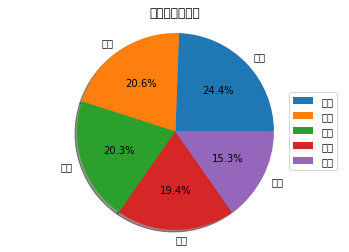

In [26]:
# 產生資料
labels = final_report_df.index
data = final_report_df["金額"]
 
# 畫出圖表
plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure()
plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("產品銷售比例圖")
# 設定圖例
plt.legend(loc='right')
plt.axis('equal')
plt.show()

## 若遇到中文不能顯示的問題

Matplotlib 解決中文亂碼教學：[連結](https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/359974/)

# 將圖表輸出到 Excel 上

In [ ]:
plot = report_sheet.pictures.add(fig, left=report_sheet.range('E1').left, 
                                 top=report_sheet.range('E1').top)

![](https://drive.google.com/uc?export=download&id=1OVEhF24_2VDpgo0PdqJY6PgX9WJ2YG9n)

# 完整版程式碼

In [ ]:
import xlwings as xw
import pandas as pd
import matplotlib.pyplot as plt

# 請輸入 pivot_table.xlsx 的絕對路徑
wb = xw.Book(r"pivot_table.xlsx")

data_sheet = wb.sheets["銷售數據"]
report_sheet = wb.sheets["報告"]
# 將銷售資料截取出來，存入 DataFrame
df = data_sheet.range("A1").options(pd.DataFrame, expand="table").value

report_df = df.groupby(by="產品").sum()
final_report_df = report_df.sort_values(by="金額", ascending=False)
# 問題是這樣的數字依然不明顯，所以我們另外在 DataFrame 加入新的一欄，計算出每一種水果的銷量的百分比
report_df["比例%"] =  report_df["金額"] * 100 / report_df["金額"].sum()
final_report_df = report_df.sort_values(by="金額", ascending=False)
report_sheet.range("A1").value = final_report_df
# 產生資料
labels = final_report_df.index
data = final_report_df["金額"]
# 畫出圖表
plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure()
plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("產品銷售比例圖")
# 設定圖例
plt.legend(loc='right')
plt.axis('equal')
plt.show()

plot = report_sheet.pictures.add(fig, left=report_sheet.range('E1').left, 
                                 top=report_sheet.range('E1').top)

## 測試：輸出完整報表

希望能夠產生類似像以下格式的報表：

![](https://drive.google.com/uc?export=download&id=16KE3RTbX02KYh0ATo27yCraqLRv1XGLP)

此時我們可以先將兩個樞紐報表，以及圓餅圖會出現的位置定義名稱：

`pivot_product` 代表產品樞紐報表的名稱

`pivot_salesmen` 代表銷售員樞紐報表的名稱

`pie_chart_product` 代表圓餅圖的名稱

最後就可以將 `DataFrame` 各自寫入不同的範圍：

In [ ]:
test_sheet = wb.sheets["報表2"]

In [ ]:
test_sheet.range("pivot_product").value = final_report_df

In [ ]:
# 產生資料
labels = final_report_df.index
data = final_report_df["金額"]
# 畫出圖表
plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure()
plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("產品銷售比例圖")
# 設定圖例
plt.legend(loc='right')
plt.axis('equal')
plt.show()

plot = test_sheet.pictures.add(fig, left=test_sheet.range('pie_chart_product').left, 
                                 top=test_sheet.range('pie_chart_product').top)

In [ ]:
report2 = df.groupby("業務員").sum().sort_values("金額", ascending=False)
report2["比例%"] = report2["金額"] * 100 / report2["金額"].sum()

test_sheet.range("pivot_salesmen").value = report2